# nmi | spring 2024
## lecture 15 : tacoma narrows bridge


## tacoma narrows bridge


galloping gertie [@simscale](https://www.simscale.com/blog/tacoma-narrows-bridge-collapse/) [@quora](https://www.quora.com/Can-a-bridge-collapse-because-of-mechanical-resonance)
</br>




mckenna and tuama (2001) attempted to explain the 1940 failure of the tacoma narrows suspension bridge with a mathematical model to explain how vertical force amplifies torsional oscillation.
</br></br>

consider roadway of width $2l$ between two cables. fig 6.18a shows this in cross-section. consider only side-to-side motion, ignoring the length of the bridge. at rest the roadway hangs at a certain equilibrium height due to gravity; let $y$ denote the current distance the center of the roadway hangs below this equilibrium.
</br></br>

hookes law postulates a linear response, meaning that the restoring force the cables apply will be proportional to the deviation. let $\theta$ be the angle the roadway makes with the horizontal. there are two suspension cables, stretched $y − lsin\theta$ and $y + lsin\theta$ from equilibrium. assume that a viscous damping term is given that is proportional to the velocity. using newtons law $F = ma$ and denoting Hookes constant by $K$, the equations of motion for $y,\theta$ are as follows:
</br></br>

\begin{align}
  y'' &= -dy' - \left[ \frac{K}{m}(y-lsin\theta) + \frac{K}{m}(y+lsin\theta) \right] \\
  \theta'' &= -d\theta' + \frac{3cos\theta}{l}\left[ \frac{K}{m}(y-sin\theta) - \frac{K}{m}(y+lsin\theta) \right]
\end{align}
</br>


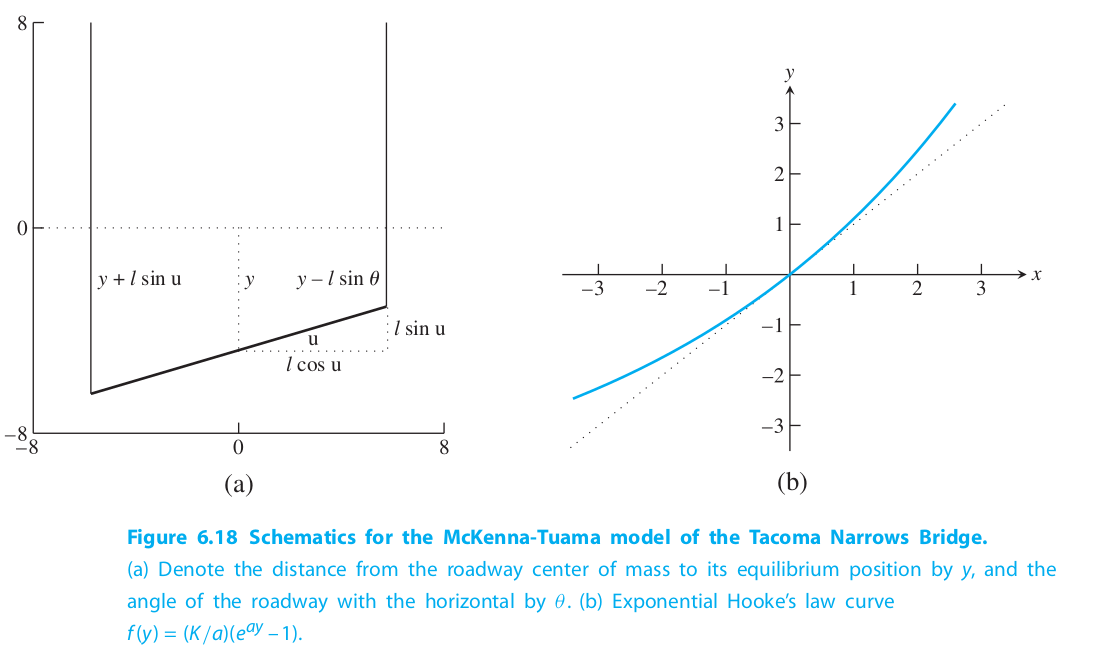

however, hookes law is designed for springs, where the restoring force is more or less equal whether the springs are compressed or stretched. mcKenna and tuama hypothesize that cables pull back with more force when stretched than they push back when compressed. (think of a string as an extreme example.) they replace the linear hookes law restoring force $f(y) = Ky$ with a nonlinear force $f(y) = \frac{K}{a}(e^{ay} - 1)$, as shown in fig 6.18b. both functions have the same slope $K$ at $y = 0$; but for the nonlinear force, a positive $y$ (stretched cable) causes a stronger restoring force than the corresponding negatively (slackened cable). making this replacement in the preceding equations yields
</br></br>

\begin{align}
  y'' &= -dy' - \frac{K}{ma}\left[ e^{a(y-lsin\theta)} - 1 + e^{a(y+lsin\theta)} - 1 \right] \\
  \theta'' &= -d\theta' + \frac{3cos\theta}{l}\frac{K}{ma}\left[ e^{a(y-sin\theta)} - e^{a(y+lsin\theta)} \right]
\end{align}
</br>

as the equations stand, the state $y = y' = \theta = \theta' = 0$ is an equilibrium. now turn on the wind. add the forcing term $0.2W sin \omega t$ to the right-hand side of the $y$ equation, where $W$ is the wind speed in $km/hr$. this adds a strictly vertical oscillation to the bridge.
</br></br>

useful estimates for the physical constants can be made. the mass of a one-foot length of roadway was about $2500 kg$, and the spring constant $K$ has been estimated at $1000 N$. the roadway was about $12 m$ wide. For this simulation, the damping coefﬁcient was set at $d = 0.01$, and the hookes nonlinearity coefﬁcient $a = 0.2$. An observer counted 38 vertical oscillations of the bridge in one minute shortly before the collapse — set $\omega = 2\pi(38/60)$. these coefﬁcients are only guesses, but they sufﬁce to show ranges of motion that tend to match photographic evidence of the bridges ﬁnal oscillations.
</br></br>

run code with the default parameter values to see the phenomenon postulated earlier. if the angle $\theta$ of the roadway is set to any small nonzero value, vertical forcing causes $\theta$ to eventually grow to a macroscopic value, leading to signiﬁcant torsion of the roadway. the interesting point is that there is no torsional forcing applied to the equation; the unstable "torsional mode" is excited completely by vertical forcing.
</br>


###### code


In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
# from previous lectures

# solver: order 2, trapezoid
def trap_step(t,y,h,ydot):
  s1 = ydot(t,y)
  s2 = ydot(t+h,y+h*s1)
  rc = y+h/2*(s1+s2)
  return rc




rc 6, tacoma narrows bridge, h=0.04



,t,y,y',θ,θ',xa,ya,xb,yb
0,0.00,1.00000,0.00000,0.00100,0.00000e+00,-6.0,1.00000,6.0,1.00000
1,0.04,0.99929,0.01530,0.00100,-1.17231e-07,-6.0,0.99329,6.0,1.00529
2,0.08,1.00122,0.13076,0.00100,-2.34405e-07,-6.0,0.99522,6.0,1.00722
3,0.12,1.00975,0.34232,0.00100,-3.51631e-07,-6.0,1.00375,6.0,1.01575
4,0.16,1.02861,0.64338,0.00100,-4.69108e-07,-6.0,1.02261,6.0,1.03461
...,...,...,...,...,...,...,...,...,...
96,3.84,-4.93008,1.20392,0.00097,-1.27440e-05,-6.0,-4.93590,6.0,-4.92426
97,3.88,-4.87463,1.52075,0.00097,-1.27738e-05,-6.0,-4.88044,6.0,-4.86881
98,3.92,-4.80842,1.73891,0.00097,-1.28040e-05,-6.0,-4.81424,6.0,-4.80261
99,3.96,-4.73551,1.85529,0.00097,-1.28347e-05,-6.0,-4.74133,6.0,-4.72970


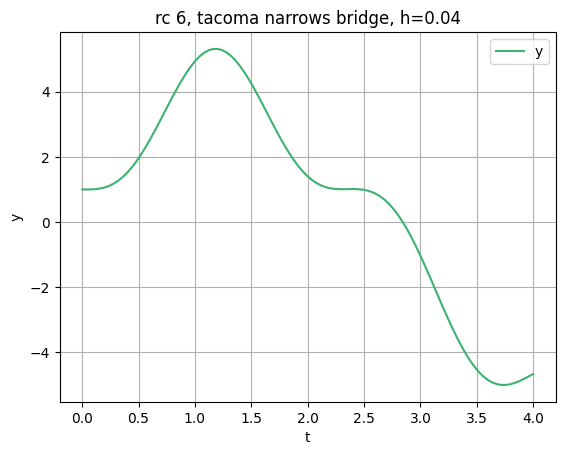

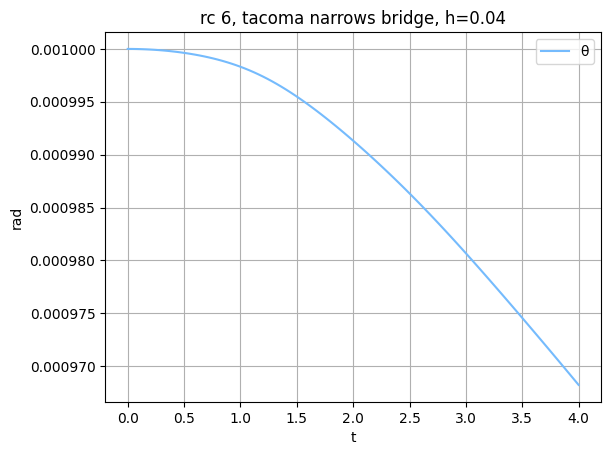

In [ ]:
# program 6.6 - no animation! dream on!

# ivp: f(t,y)
def ydot(t,y):
  '''
  y : [y,y',θ,θ']
  '''
  rc = np.zeros_like(y)
  W=80;w=2*np.pi*38/60;a=0.2
  m=2500;K=1000;l=6;d=0.01

  a1=np.exp(a*(y[0]-l*np.sin(y[2])))
  a2=np.exp(a*(y[0]+l*np.sin(y[2])))

  rc[0] = y[1]
  rc[1] = -d*y[1] - K/(m*a)*(a1+a2-2) + (0.2*W)*np.sin(w*t)
  rc[2] = y[3]
  rc[3] = -d*y[3] + 3*np.cos(y[2])/(l*m*a)*(a1-a2)
  return rc

# ivp: ic,t
ic = np.array([1,0,0.001,0])
t = [0,1000]
l = 6 # 1/2 roadway width # repeated declaration

# evaluate n, plot p
n = 25000
p = 100
h = (t[1]-t[0])/n

# datastore
ds = np.zeros((p+1,9)) # t,y,y',θ,θ',x1,y1,x2,y2
# datastore, ic
ds[0,0] = t[0]
ds[0,1:len(ic)+1] = ic
ds[0,len(ic)+1:9] = [-l,ic[0],l,ic[0]]

t1 = t2 = t[0]
y1 = y2 = ic
for k in range(p):
  for i in range(round(n/p)):
    t2 = t1 + h;
    y2 = trap_step(t1,y1,h,ydot)

  ds[k+1,0] = t2
  ds[k+1,1:len(y2)+1] = y2

  # below: mod for ani func
  '''
  y = y2[0]
  theta = y2[2]
  dx = l*np.cos(theta)
  dy = l*np.sin(theta)
  road = [[-dx, dx],[-dy-y,dy-y]] # span of roadway
  lcab = [[-dx,-dx],[-dy-y,8]] # span of left cable
  rcab = [[ dx, dx],[ dy-y,8]] # span of right cable
  '''
  dy = np.sin(y2[2]) # theta
  ds[k+1,5] = -l # xa = -(roadway width)/2
  ds[k+1,6] = y2[0] + ds[k+1,5]*dy # ya at xa
  ds[k+1,7] =  l # xb = +(roadway width)/2
  ds[k+1,8] = y2[0] + ds[k+1,7]*dy # yb at xb
  t1 = t2
  y1 = y2
  # above: be mod for ani func

# dataframe from datastore
s_title = "rc 6, tacoma narrows bridge, h=" + str(h)
print(f"\n\n"+s_title+"\n") # bc pf.style.set_caption() bites in colab atm
pd.set_option("display.max_rows",10)
pd.set_option("display.precision",5)
df = pd.DataFrame(data=ds,columns=["t","y","y'","θ","θ'","xa","ya","xb","yb"])
if True: # spreadsheet
  display(df)

if True: # plot
  ax1  = df.plot(x="t",y="y",label="y",color="mediumseagreen")
  ax1.set_title(s_title)
  ax1.set_xlabel("t")
  ax1.set_ylabel("y")
  #ax1.axis((0,2,0,1.2))
  ax1.grid('on',which='major',axis='x')
  ax1.grid('on',which='major',axis='y')

  ax2  = df.plot(x="t",y="θ",label="θ",color="xkcd:sky blue")
  ax2.set_title(s_title)
  ax2.set_xlabel("t")
  ax2.set_ylabel("rad")
  ax2.grid('on',which='major',axis='x')
  ax2.grid('on',which='major',axis='y')

  plt.legend(bbox_to_anchor=(1,1))
  plt.show()

#### miscellaney


* videos and stuff [@gmu](http://mason.gmu.edu/~arahma12/Project3.html)
</br>
